In [1]:
import numpy as np
import pandas as pd
from itertools import product

# 1. Create a data frame

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range('20130101', periods=6)
df1 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df1

,A,B,C,D
2013-01-01,0.656599,-1.953975,-0.782389,1.332695
2013-01-02,-0.865406,0.833428,-0.486961,1.753012
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623
2013-01-04,-2.736904,-1.605498,0.257038,1.123684
2013-01-05,0.464837,1.258467,-0.923365,1.393342
2013-01-06,-0.356171,-0.493733,0.805493,-0.280037


In [4]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'}
                  )

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [5]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 2. Viewing data

In [6]:
# df1
display(df1.head())
display(df1.tail())
display(df1[2:4])

,A,B,C,D
2013-01-01,0.656599,-1.953975,-0.782389,1.332695
2013-01-02,-0.865406,0.833428,-0.486961,1.753012
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623
2013-01-04,-2.736904,-1.605498,0.257038,1.123684
2013-01-05,0.464837,1.258467,-0.923365,1.393342


,A,B,C,D
2013-01-02,-0.865406,0.833428,-0.486961,1.753012
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623
2013-01-04,-2.736904,-1.605498,0.257038,1.123684
2013-01-05,0.464837,1.258467,-0.923365,1.393342
2013-01-06,-0.356171,-0.493733,0.805493,-0.280037


,A,B,C,D
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623
2013-01-04,-2.736904,-1.605498,0.257038,1.123684


In [7]:
display(df1[['A','C']].head(2))
display(df1[['B','D']].tail(3))

,A,C
2013-01-01,0.656599,-0.782389
2013-01-02,-0.865406,-0.486961


,B,D
2013-01-04,-1.605498,1.123684
2013-01-05,1.258467,1.393342
2013-01-06,-0.493733,-0.280037


In [8]:
# df1
df1.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.656599,-0.865406,-0.724421,-2.736904,0.464837,-0.356171
B,-1.953975,0.833428,0.380138,-1.605498,1.258467,-0.493733
C,-0.782389,-0.486961,-1.178444,0.257038,-0.923365,0.805493
D,1.332695,1.753012,-0.769623,1.123684,1.393342,-0.280037


In [9]:
df1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df1.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.593578,-0.263529,-0.384771,0.758846
std,1.218557,1.314958,0.763831,1.026534
min,-2.736904,-1.953975,-1.178444,-0.769623
25%,-0.830160,-1.327557,-0.888121,0.070893
50%,-0.540296,-0.056798,-0.634675,1.228190
75%,0.259585,0.720106,0.071038,1.378180
max,0.656599,1.258467,0.805493,1.753012


In [11]:
# df1.sort_index(axis=0, ascending=False) # axis=0 is index
df1.sort_index(axis=1, ascending=False) # axis=1 is columns

,D,C,B,A
2013-01-01,1.332695,-0.782389,-1.953975,0.656599
2013-01-02,1.753012,-0.486961,0.833428,-0.865406
2013-01-03,-0.769623,-1.178444,0.380138,-0.724421
2013-01-04,1.123684,0.257038,-1.605498,-2.736904
2013-01-05,1.393342,-0.923365,1.258467,0.464837
2013-01-06,-0.280037,0.805493,-0.493733,-0.356171


In [12]:
# df1.sort_values(by='B', ascending=True)
df1.sort_values(by=['B'])

,A,B,C,D
2013-01-01,0.656599,-1.953975,-0.782389,1.332695
2013-01-04,-2.736904,-1.605498,0.257038,1.123684
2013-01-06,-0.356171,-0.493733,0.805493,-0.280037
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623
2013-01-02,-0.865406,0.833428,-0.486961,1.753012
2013-01-05,0.464837,1.258467,-0.923365,1.393342


In [13]:
df1.shape

(6, 4)

# 3. Selecting data

In [14]:
# df.iat[row_i,col_j]

In [15]:
# df.at[first, col_name]

In [16]:
# slicing data frame using indices and columns names
# df.loc[list_of_indices, list_of_cols]

In [17]:
# df.iloc is used for integer based indexing
# df.iloc[[row_no1,row_no2],[col_no1,col_no2]]
# df.iloc[start_row:end_row, start_col:end_col]]

loc is primarily label based indexing. Integers may be used but they are interpreted as a label.
iloc is primarily integer based indexing

In [18]:
df1['A']

2013-01-01    0.656599
2013-01-02   -0.865406
2013-01-03   -0.724421
2013-01-04   -2.736904
2013-01-05    0.464837
2013-01-06   -0.356171
Freq: D, Name: A, dtype: float64

In [19]:
df1[0:3]

,A,B,C,D
2013-01-01,0.656599,-1.953975,-0.782389,1.332695
2013-01-02,-0.865406,0.833428,-0.486961,1.753012
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623


In [20]:
df1.loc[dates[3]]

A   -2.736904
B   -1.605498
C    0.257038
D    1.123684
Name: 2013-01-04 00:00:00, dtype: float64

In [21]:
df1.loc[:, ['A', 'D']]

,A,D
2013-01-01,0.656599,1.332695
2013-01-02,-0.865406,1.753012
2013-01-03,-0.724421,-0.769623
2013-01-04,-2.736904,1.123684
2013-01-05,0.464837,1.393342
2013-01-06,-0.356171,-0.280037


In [22]:
df1.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.865406,0.833428
2013-01-03,-0.724421,0.380138
2013-01-04,-2.736904,-1.605498


In [23]:
df1.loc[dates[1]:dates[3], ['A', 'B']]

,A,B
2013-01-02,-0.865406,0.833428
2013-01-03,-0.724421,0.380138
2013-01-04,-2.736904,-1.605498


In [24]:
df1.at[dates[0], 'A']

0.6565993413491272

In [25]:
df1.loc[dates[0], 'A']

0.6565993413491272

In [26]:
df1.iloc[3]

A   -2.736904
B   -1.605498
C    0.257038
D    1.123684
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
df1.iloc[3:5, 0:2]

,A,B
2013-01-04,-2.736904,-1.605498
2013-01-05,0.464837,1.258467


In [28]:
df1.iloc[[1,3,5], [0,2]]

,A,C
2013-01-02,-0.865406,-0.486961
2013-01-04,-2.736904,0.257038
2013-01-06,-0.356171,0.805493


In [29]:
df1.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.865406,0.833428,-0.486961,1.753012
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623


In [30]:
df1.iloc[:, 1:3]

,B,C
2013-01-01,-1.953975,-0.782389
2013-01-02,0.833428,-0.486961
2013-01-03,0.380138,-1.178444
2013-01-04,-1.605498,0.257038
2013-01-05,1.258467,-0.923365
2013-01-06,-0.493733,0.805493


In [31]:
df1.iloc[2,2]

-1.178444149669792

In [32]:
df1.iat[2,2]

-1.178444149669792

In [33]:
df1

,A,B,C,D
2013-01-01,0.656599,-1.953975,-0.782389,1.332695
2013-01-02,-0.865406,0.833428,-0.486961,1.753012
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623
2013-01-04,-2.736904,-1.605498,0.257038,1.123684
2013-01-05,0.464837,1.258467,-0.923365,1.393342
2013-01-06,-0.356171,-0.493733,0.805493,-0.280037


In [34]:
df1[df1['A'] > 0]

,A,B,C,D
2013-01-01,0.656599,-1.953975,-0.782389,1.332695
2013-01-05,0.464837,1.258467,-0.923365,1.393342


In [35]:
df1[df1 > 0]

,A,B,C,D
2013-01-01,0.656599,NaN,NaN,1.332695
2013-01-02,NaN,0.833428,NaN,1.753012
2013-01-03,NaN,0.380138,NaN,NaN
2013-01-04,NaN,NaN,0.257038,1.123684
2013-01-05,0.464837,1.258467,NaN,1.393342
2013-01-06,NaN,NaN,0.805493,NaN


# 4. Missing data

In [36]:
df3 = df1.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
display(df3)
display(df3[df3['E'].isin(['two', 'four'])])

,A,B,C,D,E
2013-01-01,0.656599,-1.953975,-0.782389,1.332695,one
2013-01-02,-0.865406,0.833428,-0.486961,1.753012,one
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623,two
2013-01-04,-2.736904,-1.605498,0.257038,1.123684,three
2013-01-05,0.464837,1.258467,-0.923365,1.393342,four
2013-01-06,-0.356171,-0.493733,0.805493,-0.280037,three


,A,B,C,D,E
2013-01-03,-0.724421,0.380138,-1.178444,-0.769623,two
2013-01-05,0.464837,1.258467,-0.923365,1.393342,four


In [37]:
df3['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [38]:
df1['F'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df1.at[dates[0], 'A'] = 0
df1.iat[0, 1] = 0
df1.loc[:, 'D'] = np.array([5] * len(df1))


In [39]:
df1

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.782389,5,NaN
2013-01-02,-0.865406,0.833428,-0.486961,5,1.0
2013-01-03,-0.724421,0.380138,-1.178444,5,2.0
2013-01-04,-2.736904,-1.605498,0.257038,5,3.0
2013-01-05,0.464837,1.258467,-0.923365,5,4.0
2013-01-06,-0.356171,-0.493733,0.805493,5,5.0


In [40]:
df4 = df1.copy()
df4[df4 > 0] = - df4

In [41]:
df4

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.782389,-5,NaN
2013-01-02,-0.865406,-0.833428,-0.486961,-5,-1.0
2013-01-03,-0.724421,-0.380138,-1.178444,-5,-2.0
2013-01-04,-2.736904,-1.605498,-0.257038,-5,-3.0
2013-01-05,-0.464837,-1.258467,-0.923365,-5,-4.0
2013-01-06,-0.356171,-0.493733,-0.805493,-5,-5.0


In [42]:
df4 = df4.reindex(index=dates[0:4], columns=list(df4.columns) + ['E'])
df4.loc[dates[0]:dates[1], 'E'] = 1
df4

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.782389,-5,NaN,1.0
2013-01-02,-0.865406,-0.833428,-0.486961,-5,-1.0,1.0
2013-01-03,-0.724421,-0.380138,-1.178444,-5,-2.0,NaN
2013-01-04,-2.736904,-1.605498,-0.257038,-5,-3.0,NaN


In [43]:
df4.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.865406,-0.833428,-0.486961,-5,-1.0,1.0


In [44]:
df4.dropna(axis=0, inplace=False)

,A,B,C,D,F,E
2013-01-02,-0.865406,-0.833428,-0.486961,-5,-1.0,1.0


In [45]:
df4.dropna(axis=1, inplace=False)

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.782389,-5
2013-01-02,-0.865406,-0.833428,-0.486961,-5
2013-01-03,-0.724421,-0.380138,-1.178444,-5
2013-01-04,-2.736904,-1.605498,-0.257038,-5


In [46]:
df4.fillna(value=7)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.782389,-5,7.0,1.0
2013-01-02,-0.865406,-0.833428,-0.486961,-5,-1.0,1.0
2013-01-03,-0.724421,-0.380138,-1.178444,-5,-2.0,7.0
2013-01-04,-2.736904,-1.605498,-0.257038,-5,-3.0,7.0


In [47]:
pd.isna(df4)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 5. Operations

In [48]:
data = np.arange(100).reshape(20,-1)
cols = ['a', 'b', 'c', 'e', 'f']

In [49]:
# df = pd.DataFrame(data=data, columns=cols)
df = pd.DataFrame(data, columns=cols)
# df = pd.DataFrame(data)
df.head()

,a,b,c,e,f
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [50]:
# all operations +,-,*,/
(df['a'] / df['c']).head()

0    0.000000
1    0.714286
2    0.833333
3    0.882353
4    0.909091
dtype: float64

In [51]:
((df['c'] - df['b'])/df['b']).head()

0    1.000000
1    0.166667
2    0.090909
3    0.062500
4    0.047619
dtype: float64

In [52]:
(df['c'] / df['b'] -1).head()

0    1.000000
1    0.166667
2    0.090909
3    0.062500
4    0.047619
dtype: float64

In [53]:
df.diff().head()

,a,b,c,e,f
0,NaN,NaN,NaN,NaN,NaN
1,5.0,5.0,5.0,5.0,5.0
2,5.0,5.0,5.0,5.0,5.0
3,5.0,5.0,5.0,5.0,5.0
4,5.0,5.0,5.0,5.0,5.0


In [54]:
# df.diff(axis=0).head()
df.diff(axis=1).head()

,a,b,c,e,f
0,NaN,1.0,1.0,1.0,1.0
1,NaN,1.0,1.0,1.0,1.0
2,NaN,1.0,1.0,1.0,1.0
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0


In [55]:
df.diff(periods=2).head()

,a,b,c,e,f
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,10.0,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0,10.0
4,10.0,10.0,10.0,10.0,10.0


In [56]:
# df.diff(axis=0, periods=2).head()
df.diff(axis=1, periods=2).head()

,a,b,c,e,f
0,NaN,NaN,2.0,2.0,2.0
1,NaN,NaN,2.0,2.0,2.0
2,NaN,NaN,2.0,2.0,2.0
3,NaN,NaN,2.0,2.0,2.0
4,NaN,NaN,2.0,2.0,2.0


In [57]:
# df.diff(axis=0, periods=-1).tail()
df.diff(periods=-1).tail()

,a,b,c,e,f
15,-5.0,-5.0,-5.0,-5.0,-5.0
16,-5.0,-5.0,-5.0,-5.0,-5.0
17,-5.0,-5.0,-5.0,-5.0,-5.0
18,-5.0,-5.0,-5.0,-5.0,-5.0
19,NaN,NaN,NaN,NaN,NaN


In [58]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
a,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
b,1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96
c,2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97
e,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,98
f,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99


In [59]:
# df.mean(axis=0)
df.mean()

a    47.5
b    48.5
c    49.5
e    50.5
f    51.5
dtype: float64

In [60]:
# df.mean(axis=1)
df.mean(1)

0      2.0
1      7.0
2     12.0
3     17.0
4     22.0
5     27.0
6     32.0
7     37.0
8     42.0
9     47.0
10    52.0
11    57.0
12    62.0
13    67.0
14    72.0
15    77.0
16    82.0
17    87.0
18    92.0
19    97.0
dtype: float64

In [61]:
# df.shift(2)
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
display(s)
display(df1)
df1.sub(s, axis='index')

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.782389,5,NaN
2013-01-02,-0.865406,0.833428,-0.486961,5,1.0
2013-01-03,-0.724421,0.380138,-1.178444,5,2.0
2013-01-04,-2.736904,-1.605498,0.257038,5,3.0
2013-01-05,0.464837,1.258467,-0.923365,5,4.0
2013-01-06,-0.356171,-0.493733,0.805493,5,5.0


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.724421,-0.619862,-2.178444,4.0,1.0
2013-01-04,-5.736904,-4.605498,-2.742962,2.0,0.0
2013-01-05,-4.535163,-3.741533,-5.923365,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [62]:
df1.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.782389,5,NaN
2013-01-02,-0.865406,0.833428,-1.269351,10,1.0
2013-01-03,-1.589827,1.213566,-2.447795,15,3.0
2013-01-04,-4.326731,-0.391932,-2.190757,20,6.0
2013-01-05,-3.861894,0.866535,-3.114121,25,10.0
2013-01-06,-4.218065,0.372802,-2.308629,30,15.0


In [63]:
df1.sum()

A    -4.218065
B     0.372802
C    -2.308629
D    30.000000
F    15.000000
dtype: float64

In [64]:
df1.apply(lambda x: x.max() - x.min())

A    3.201741
B    2.863965
C    1.983937
D    0.000000
F    4.000000
dtype: float64

In [65]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
a,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
b,1,6,11,16,21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,96
c,2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97
e,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,98
f,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99


In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

5    3
3    3
0    2
4    1
2    1
dtype: int64

In [67]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 6. Merge

In [68]:
pieces = [df[2:5], df[7:9], df[13:15]]
pd.concat(pieces)

# pd.concat([df1, df2], axis=0) # vertical concatenation
# pd.concat([df1, df2], axis=1) # horizontal concatenation

,a,b,c,e,f
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24
7,35,36,37,38,39
8,40,41,42,43,44
13,65,66,67,68,69
14,70,71,72,73,74


In [69]:
s1 = pd.DataFrame({'key': ['foo', 'foo'], 's1_val': [1, 2]})
s2 = pd.DataFrame({'key': ['foo', 'foo'], 's2_val': [4, 5]})
pd.merge(s1, s2, on='key')

,key,s1_val,s2_val
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [70]:
s3 = pd.DataFrame({'key': ['foo', 'bar'], 's3_val': [1, 2]})
s4 = pd.DataFrame({'key': ['foo', 'bar'], 's4_val': [4, 5]})
pd.merge(s3, s4, on='key')

,key,s3_val,s4_val
0,foo,1,4
1,bar,2,5


In [71]:
# Assume:
# df1--> name, age, height
# df2---> name, salary, pincode, sick_leaves_taken

# df1.merge(df2, on=['name'], how='inner')

# result columns are:
# name, age, height, salary, pincode, sick_leaves_taken

# inner means that if a row matched on "name", then we have that row in the result.

# 7. Grouping

In [72]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)}
                 )

df

,A,B,C,D
0,foo,one,-0.432742,0.344449
1,bar,one,0.311506,-1.648834
2,foo,two,-0.476678,0.447075
3,bar,three,-1.002038,-0.303814
4,foo,two,0.629558,0.118851
5,bar,two,0.124678,-1.338350
6,foo,one,-2.528118,0.050609
7,foo,three,0.166670,0.389131


In [73]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.565855,-3.290997
foo,-2.641310,1.350114


In [74]:
df.groupby(['A', 'B']).sum()
# df.groupby(['A', 'B']).mean()
# df.groupby(['A', 'B']).std()
# df.groupby(['A', 'B']).var()

C         D
A   B                        
bar one    0.311506 -1.648834
    three -1.002038 -0.303814
    two    0.124678 -1.338350
foo one   -2.960860  0.395058
    three  0.166670  0.389131
    two    0.152879  0.565925

In [75]:
# for multiple index, we can have multiple level as well
df.groupby(level=[0]).sum()

,C,D
0,-0.432742,0.344449
1,0.311506,-1.648834
2,-0.476678,0.447075
3,-1.002038,-0.303814
4,0.629558,0.118851
5,0.124678,-1.338350
6,-2.528118,0.050609
7,0.166670,0.389131


# 8. Reshaping & Categorizing 

In [76]:
# tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
#                 ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

tuples = list(product(['bar', 'baz', 'foo', 'qux'], ['one', 'two']))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.243699 -0.856906
      two     0.260842 -0.393146
baz   one    -0.300267 -0.912827
      two    -0.837293  1.195876
foo   one    -0.676227 -0.905505
      two    -0.405845 -0.911096
qux   one    -1.147638  1.202954
      two    -1.397374  0.015158

In [77]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.243699 -0.856906
      two     0.260842 -0.393146
baz   one    -0.300267 -0.912827
      two    -0.837293  1.195876

In [78]:
df2s = df2.stack()
df2s

first  second   
bar    one     A   -0.243699
               B   -0.856906
       two     A    0.260842
               B   -0.393146
baz    one     A   -0.300267
               B   -0.912827
       two     A   -0.837293
               B    1.195876
dtype: float64

In [79]:
df2s.unstack()

A         B
first second                    
bar   one    -0.243699 -0.856906
      two     0.260842 -0.393146
baz   one    -0.300267 -0.912827
      two    -0.837293  1.195876

In [80]:
df2s.unstack(0)

first          bar       baz
second                      
one    A -0.243699 -0.300267
       B -0.856906 -0.912827
two    A  0.260842 -0.837293
       B -0.393146  1.195876

In [81]:
df2s.unstack(1)

second        one       two
first                      
bar   A -0.243699  0.260842
      B -0.856906 -0.393146
baz   A -0.300267 -0.837293
      B -0.912827  1.195876

In [82]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)}
                 )

df

,A,B,C,D,E
0,one,A,foo,-0.578570,-0.146374
1,one,B,foo,-0.782980,-2.156994
2,two,C,foo,-0.532230,-0.749848
3,three,A,bar,-0.400039,-0.790762
4,one,B,bar,1.358167,0.154610
5,one,C,bar,1.464713,-0.789674
6,two,A,foo,0.080339,0.587304
7,three,B,foo,0.742481,0.784514
8,one,C,foo,-0.556833,0.161143
9,one,A,bar,2.246954,-0.667258


In [83]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  2.246954 -0.578570
      B  1.358167 -0.782980
      C  1.464713 -0.556833
three A -0.400039       NaN
      B       NaN  0.742481
      C -0.818417       NaN
two   A       NaN  0.080339
      B -0.576195       NaN
      C       NaN -0.532230

In [84]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [85]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [86]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [87]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [88]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [89]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 9. Plotting

In [90]:
import matplotlib.pyplot as plt

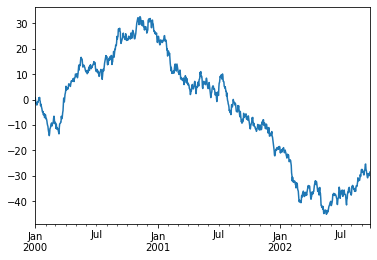

In [91]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

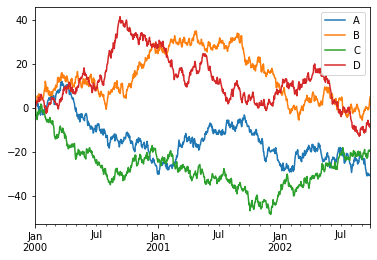

In [92]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend()

# 10. Stroing/Reading data

In [93]:
# df.to_csv(filename, 'df')
# pd.read_csv(filename)
    
# df.to_excel(filename, sheet_name='sheet1')
# pd.read_excel(filename, ....)
    
# pd.to_hdf(filename, 'df')
# pd.read_hdf(filename, 'df')
    
result = pd.HDFStore('neurocog.h5')
result['main'] = df
result.close()   

In [94]:
result = pd.HDFStore('neurocog.h5', mode='r')

In [95]:
result.keys()

['/main']

In [96]:
result['main']

,A,B,C,D
2000-01-01,1.594297,-0.193717,-0.176773,-1.191262
2000-01-02,2.239965,1.207157,-0.448157,-0.113776
2000-01-03,1.642458,1.718361,-2.192495,1.709604
2000-01-04,2.564670,3.143673,-3.639493,2.671862
2000-01-05,1.964277,3.313536,-3.342666,1.798488
...,...,...,...,...
2002-09-22,-30.357405,-0.721397,-19.563312,-8.321032
2002-09-23,-30.562185,0.441884,-19.765621,-8.094749
2002-09-24,-30.968375,1.568419,-19.211498,-7.310060
2002-09-25,-30.365461,3.409721,-19.333414,-7.504578


In [97]:
result.close()

# Extra

In [98]:
df = pd.DataFrame(data={'a':[1,2,3,4,5],'b':[0,1,5,10,15]})
df

,a,b
0,1,0
1,2,1
2,3,5
3,4,10
4,5,15


In [99]:
df.rename(columns={'a':'NEW_a', 'b':'new_B'}, inplace=True)

In [100]:
df.rename(index={0:'x', 1:'y', 2:'z', 3:'P', 4:'Q'}, inplace=True)

In [101]:
df.rename({'y':'m', 'x':'l', 'z':'n'}, axis='index', inplace=True)

In [102]:
df

,NEW_a,new_B
l,1,0
m,2,1
n,3,5
P,4,10
Q,5,15


In [103]:
df.rename(str.lower, axis='columns', inplace=True)
df.rename(str.upper, axis='index', inplace=True)
df

,new_a,new_b
L,1,0
M,2,1
N,3,5
P,4,10
Q,5,15


In [104]:
df.columns=['a', 'b']
# df.columns
df.columns.tolist()

['a', 'b']

### Element's count 

In [105]:
df['a'].value_counts()

5    1
4    1
3    1
2    1
1    1
Name: a, dtype: int64

In [106]:
df['a'].value_counts()[5]

1

### Reset an index to an existing column/list/array

In [107]:
df

,a,b
L,1,0
M,2,1
N,3,5
P,4,10
Q,5,15


In [108]:
df.set_index('a', inplace=True)
df

,b
a,
1,0
2,1
3,5
4,10
5,15


In [109]:
# df.reset_index(drop=True, inplace=True)
df5 = df.reset_index(drop=False, inplace=False)
df5

,a,b
0,1,0
1,2,1
2,3,5
3,4,10
4,5,15


# Row and Columns manipulation

#### Remove a column

In [110]:
df.reset_index(drop=False, inplace=True)
df

,a,b
0,1,0
1,2,1
2,3,5
3,4,10
4,5,15


In [111]:
df.drop(columns=['a'])

,b
0,0
1,1
2,5
3,10
4,15


#### Another example

In [112]:
df1 = pd.DataFrame(data = {'age': [30,10,20,30,20], 'height': [153,100,170,175,190]},
                  index = pd.Series(['a', 'b', 'c', 'd', 'e'], name='Tag')
                  )

df1

,age,height
Tag,,
a,30,153
b,10,100
c,20,170
d,30,175
e,20,190


#### Sort by column

In [113]:
# df1.sort_values(by=list_of_cols, ascending=True)
df1.sort_values(by=['age', 'height'], ascending=True)

,age,height
Tag,,
b,10,100
c,20,170
e,20,190
a,30,153
d,30,175


#### Apply filter on data frame

In [114]:
# mask = df['age'] == age_value
# mask = df['age'].isin(list_of_age_values)

mask = df1['age'] == 20
# mask = df['age'].isin([10, 20])

df1[mask]

,age,height
Tag,,
c,20,170
e,20,190


In [115]:
# mask = (df1['age']==age_value) & (df1['height'] == height_value)
mask = (df1['age']==20) & (df1['height'] == 175)
df1[mask]

,age,height
Tag,,


In [116]:
# df1[df1['age'].isin(age_list)]
df1[df1['age'].isin([10, 20])]

,age,height
Tag,,
b,10,100
c,20,170
e,20,190


In [117]:
# df1[~df1['age'].isin(age_list)]
df1[~df1['age'].isin([10, 20])]

,age,height
Tag,,
a,30,153
d,30,175


#### Iterate over rows

In [118]:
for i, row in df1.iterrows():
    print(row['height'])

153
100
170
175
190


In [119]:
for row in df1.itertuples():
    print(row.age)

30
10
20
30
20


#### Apply a function

In [120]:
# df['series_name'].apply(f)

# def f(x, **kwargs):
#     # something to do
#     return value

# apply a function to all elements

def f(x):
    return .8 * x

df1['age'].apply(f)

Tag
a    24.0
b     8.0
c    16.0
d    24.0
e    16.0
Name: age, dtype: float64

In [121]:
df1.applymap(f)

,age,height
Tag,,
a,24.0,122.4
b,8.0,80.0
c,16.0,136.0
d,24.0,140.0
e,16.0,152.0


### Grouping/Aggregating

In [122]:
df1.groupby(['age']).agg({'height':'mean'})

,height
age,
10,100
20,180
30,164


In [123]:
# df.groupby(['age']).agg(list)
df1.groupby(['age']).agg(list)

,height
age,
10,[100]
20,"[170, 190]"
30,"[153, 175]"


### Undo last two operations

In [124]:
df2 = pd.DataFrame({'age':[20,20,18,18,16], "height":[180,175,165,163,170]})
df3 = df2.groupby(['age']).agg(list)
# df3
df3['height'].explode()

age
16    170
18    165
18    163
20    180
20    175
Name: height, dtype: object